In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [6]:
GND13Gar = candels[-17]

delz = GND13Gar[0]
nearby = GND13Gar[1][1]
host = GND13Gar[1][2]
lc = GND13Gar[1][3]

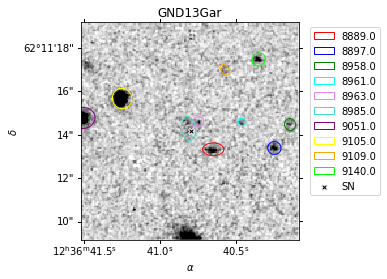

In [11]:
nick = GND13Gar[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Gar[1][0]['RA'],GND13Gar[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.008,val_max = .0185 )

In [13]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

 id    z     z_spec z_peak  l95   u95 
---- ------ ------- ------ ----- -----
8889 0.8300 -1.0000 0.8343 0.482 1.116
8897 0.9400 -1.0000 0.9359 0.420 1.463
8958 0.6800 -1.0000 0.6795 0.285 3.299
8961 1.1300 -1.0000 1.1300 0.153 1.014
8963 1.6600 -1.0000 1.6648 0.679 2.595
8985 0.5700 -1.0000 0.5734 0.173 1.227
9051 0.6500 -1.0000 0.6468 0.511 0.741
9105 2.1800 -1.0000 2.1803 2.093 2.282
9109 2.3600 -1.0000 2.3618 0.371 4.143
9140 1.3900 -1.0000 1.3929 0.806 2.193
